### Import

In [163]:
import os
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import spectral.io.aviris as aviris
import colour
from PIL import Image
from scipy.stats import multivariate_normal as mnorm
from scipy import ndimage
from matplotlib import cm
from mpl_toolkits import mplot3d
from skimage import io, color
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

### Fonts

In [164]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Load LMS Curves

In [165]:
lms = pd.read_csv('../../data/color/lms_adorption_spectra/lms-curves.csv',delimiter=',',header=None)
lms = lms.fillna(0)
lms = lms.values
idx = np.where(lms[:,0] < 700)[0]
lms = lms[idx,:]
idx = np.where(lms[:,0] > 400)[0]
lms = lms[idx,:]
lcone_idx = np.where(lms[:,1] > 0.02)[0]
mcone_idx = np.where(lms[:,2] > 0.02)[0]
scone_idx = np.where(lms[:,3] > 0.02)[0]
maxval = np.argmax(lms,axis=0)
lmax = round(lms[maxval[1],0])
mmax = round(lms[maxval[2],0])
smax = round(lms[maxval[3],0])

### Flower name list

In [166]:
flowers = ['platycodon_grandiflorum','myosotis_decumbens','gentiana_bavarica',
           'gentiana_verna','rosa_pendulina','potentilla_argentea',
           'pyrostegia_venusta','hibiscus_rosa_sinensis','chrysanthemum_leucanthemum']

### Combine Data into Martrix

In [167]:
X = []
for m in range(len(flowers)):
    data = pd.read_csv('../../data/color/flowers_reflectange_spectra/' + flowers[m] + '.csv',header=None).values
    idx = np.where(data[:,1] > 400)[0]
    data = data[idx,1:]
    data[:,1] = data[:,1] / np.max(data[:,1])
    wavelengths = data[:299,0]
    data = data[:299,1]
    X.append(data)
lms_subsampled = lms[::10,:]
lms_subsampled = lms_subsampled[:-1,1:]
X = np.array(X).T

### Compute the L, M and S activation in response to the spectral density function 

In [190]:
W = np.dot(X.T,lms_subsampled)
W = W[:,::-1]

### Load Images

In [191]:
flower_images = []
flower_colors = []
for flower in flowers:
    image_name = '../../data/color/flowers_images/' + flower + '.png'
    flower_image = Image.open(image_name)
    flower_image = np.array(flower_image)
    flower_image[:4,:,:] = 0
    flower_image[:,:4,:] = 0    
    flower_image[-4,:,:] = 0    
    flower_image[:,-4,:] = 0    
    flower_images.append(flower_image)
    image_name = '../../data/color/flowers_colors/' + flower + '.png'
    flower_image = Image.open(image_name)
    flower_image = np.array(flower_image)
    flower_image[:4,:,:] = 0
    flower_image[:,:4,:] = 0    
    flower_image[-4,:,:] = 0    
    flower_image[:,-4,:] = 0    
    flower_colors.append(flower_image)    

### Display Spectral Distributions for a number of flowers and a photograph

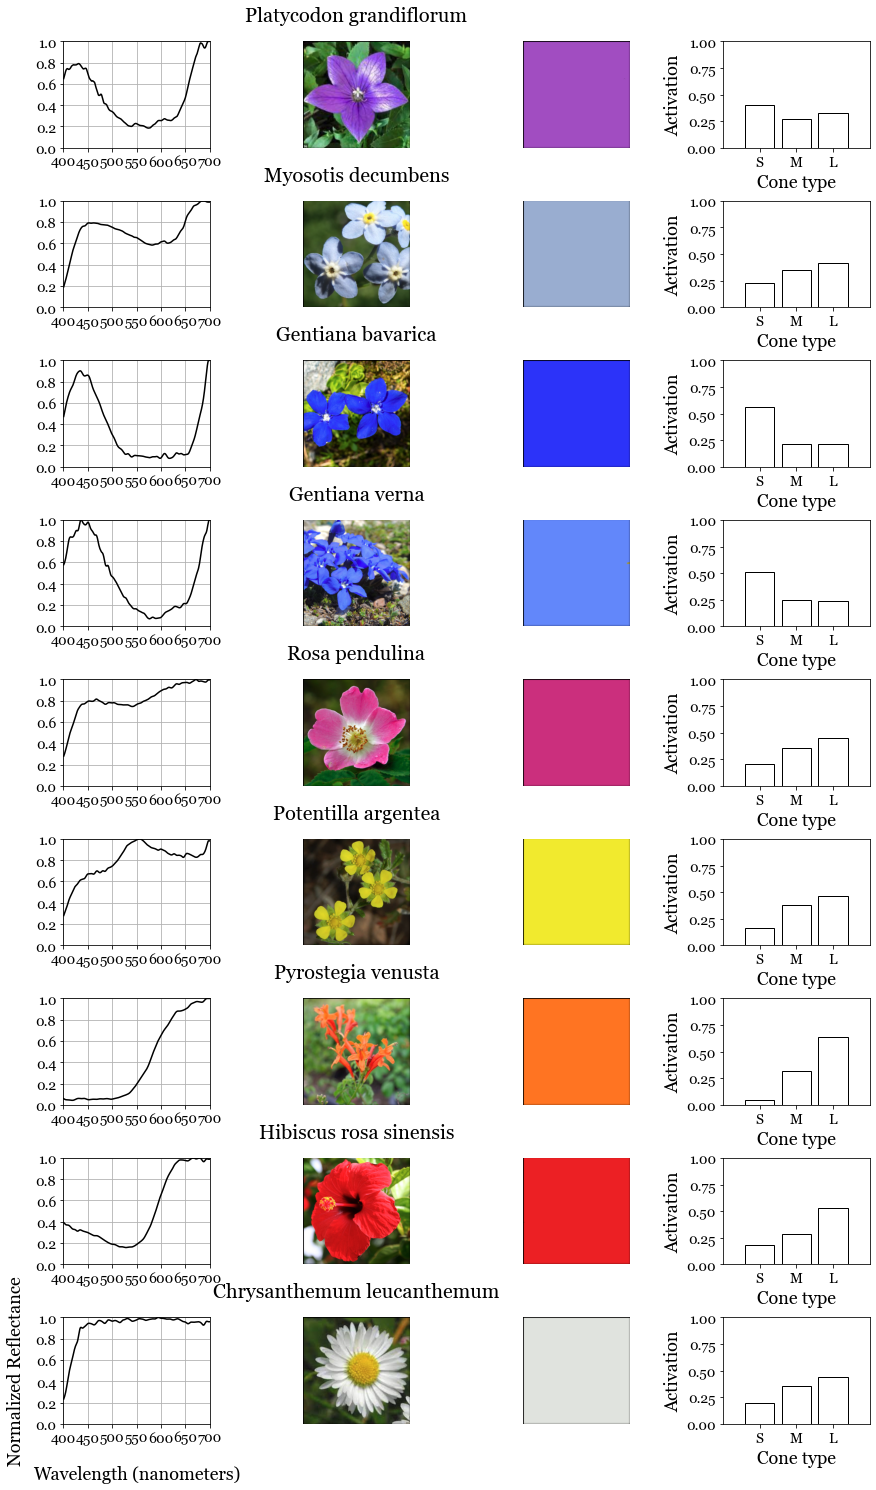

In [207]:
plt.figure(figsize=(14,24))
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
for i in range(9):
    plt.subplot(9,4,(i*4)+1)
    plt.plot(wavelengths,X[:,i],'k')
    if (i == 8): 
        plt.ylabel('Normalized Reflectance',labelpad=10,fontsize=18,**csfont);
        plt.xlabel('Wavelength (nanometers)',labelpad=20,fontsize=18,**csfont);
    plt.grid();
    plt.yticks(np.linspace(0,1,6,True),fontsize=14,**csfont);
    plt.xticks(np.linspace(400,700,7,True),xticklabels,fontsize=14,**csfont);
    plt.axis((400,700,0,1))

    plt.subplot(9,4,(i*4)+2)
    plt.imshow(flower_images[i])
    plt.axis('off')
    flowername = flowers[i].replace('_',' ').capitalize()
    plt.title(flowername,fontsize=20,**csfont,pad=20)

    plt.subplot(9,4,(i*4)+3)
    plt.imshow(flower_colors[i])
    plt.axis('off')

    plt.subplot(9,4,(i*4)+4)
    w = W[i,:]
    w = w / np.sum(w)
    plt.bar(range(3),w,facecolor='w',edgecolor='k')
    plt.xticks(range(3),labels=['S','M','L'],fontsize=14,**csfont);
    plt.yticks(np.linspace(0,1,5,True),fontsize=14,**csfont);
    plt.xlabel('Cone type',fontsize=18,**csfont);
    plt.ylabel('Activation',fontsize=18,**csfont);
    plt.axis((-1,3,0,1))
plt.savefig('../../assets/matplotlib/019_flowerspectra.png', dpi=300,bbox_inches="tight")